# World data

## Data Sources

Covid world data available at [ourworldindata.org](https://ourworldindata.org/coronavirus). Several views are already available on this site. 

We want to download the dataset to play with it ourselves. They link us toward this [github](https://github.com/owid/covid-19-data/tree/master/public/data).

Another world covid source : [Center for Systems Science and Engineering (CSSE) at Johns Hopkins University](https://github.com/CSSEGISandData/COVID-19)

Individual death profiling: [INED](https://dc-covid.site.ined.fr/en/data/pooled-datafiles/)

In [1]:
import pandas as pd

In [2]:
df_world = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [3]:
df_world.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

## Deaths / Vaccines trend

In [4]:
sub_df = df_world[["date", "total_deaths"]].dropna()

In [5]:
sub_df.head()

,date,total_deaths
28,2020-03-23,1.0
29,2020-03-24,1.0
30,2020-03-25,1.0
31,2020-03-26,2.0
32,2020-03-27,2.0
33,2020-03-28,2.0
34,2020-03-29,4.0
35,2020-03-30,4.0
36,2020-03-31,4.0
37,2020-04-01,4.0


In [8]:
sub_df.shape

(184950, 2)

<AxesSubplot:xlabel='date'>

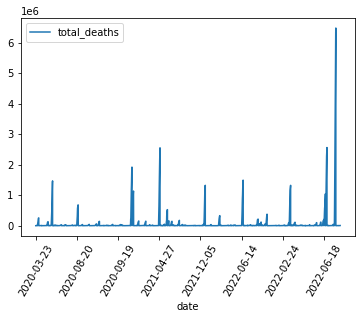

In [6]:
sub_df.plot(x="date", y="total_deaths", rot=60)

<AxesSubplot:>

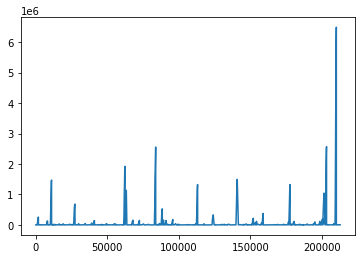

In [9]:
sub_df.total_deaths.plot()

# Age profiling

In [7]:
import requests, zipfile, io

response = requests.get("https://www.ined.fr/fichier/rte/166/Page%20Data/Pooled%20Datasets/AgeSex.zip")
myzipfile = zipfile.ZipFile(io.BytesIO(response.content))
with myzipfile.open('AgeSex/Cum_deaths_by_age_sex.csv') as age_sex_csv:
    df_age_sex = pd.read_csv(age_sex_csv)

with myzipfile.open('AgeSex/Population.csv') as pop_csv:
    df_pop = pd.read_csv(pop_csv)
